In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving credit card.xlsx to credit card.xlsx


In [3]:
df=pd.read_excel('credit card.xlsx')

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
df.isnull().sum()

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


In [6]:
df.shape

(30000, 25)

In [7]:
df.nunique()

,0
ID,30000
LIMIT_BAL,81
SEX,2
EDUCATION,7
MARRIAGE,4
AGE,56
PAY_0,11
PAY_2,11
PAY_3,11
PAY_4,11


In [8]:
df = df.rename(columns={'default.payment.next.month':'payment'})

In [9]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,payment
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [10]:
x=df.drop(['ID','payment'],axis=1)

In [11]:
x.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [12]:
y=df['payment']

In [13]:
y.head()

,payment
0,1
1,1
2,0
3,0
4,0


In [14]:
y.value_counts()

,count
payment,
0,23364
1,6636


# Extra Tree Classifier

In [15]:
from sklearn.ensemble import ExtraTreesClassifier

In [16]:
extr=ExtraTreesClassifier()

In [17]:
extr.fit(x,y)

ExtraTreesClassifier()

In [19]:
extr.feature_importances_

array([0.06523995, 0.01087153, 0.0325337 , 0.021849  , 0.06649175,
       0.09739573, 0.04589301, 0.03647477, 0.03284946, 0.0292864 ,
       0.02778391, 0.05020093, 0.04683735, 0.04546936, 0.04492811,
       0.04325507, 0.04443138, 0.04416597, 0.04247207, 0.04202453,
       0.04087471, 0.04258646, 0.04608484])

In [20]:
feature_importance = extr.feature_importances_

In [21]:
imp = pd.DataFrame(feature_importance, columns=['Gain_Score'])

In [22]:
imp

,Gain_Score
0,0.065240
1,0.010872
2,0.032534
3,0.021849
4,0.066492
5,0.097396
6,0.045893
7,0.036475
8,0.032849
9,0.029286


In [23]:
x.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [24]:
cols = pd.DataFrame(x.columns, columns=['Feature Name'])

In [26]:
cols.head()

,Feature Name
0,LIMIT_BAL
1,SEX
2,EDUCATION
3,MARRIAGE
4,AGE


In [27]:
gains=pd.concat([cols,imp],axis=1)

In [28]:
gains

,Feature Name,Gain_Score
0,LIMIT_BAL,0.065240
1,SEX,0.010872
2,EDUCATION,0.032534
3,MARRIAGE,0.021849
4,AGE,0.066492
5,PAY_0,0.097396
6,PAY_2,0.045893
7,PAY_3,0.036475
8,PAY_4,0.032849
9,PAY_5,0.029286


In [29]:
gains.nlargest(10,'Gain_Score')

,Feature Name,Gain_Score
5,PAY_0,0.097396
4,AGE,0.066492
0,LIMIT_BAL,0.065240
11,BILL_AMT1,0.050201
12,BILL_AMT2,0.046837
22,PAY_AMT6,0.046085
6,PAY_2,0.045893
13,BILL_AMT3,0.045469
14,BILL_AMT4,0.044928
16,BILL_AMT6,0.044431


<Axes: >

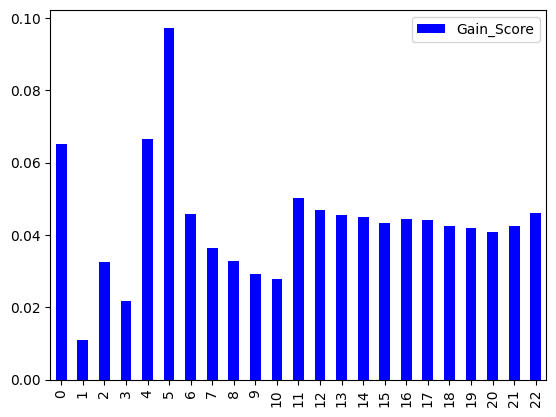

In [30]:
gains.plot(kind='bar',color='blue') #horizontal

<Axes: >

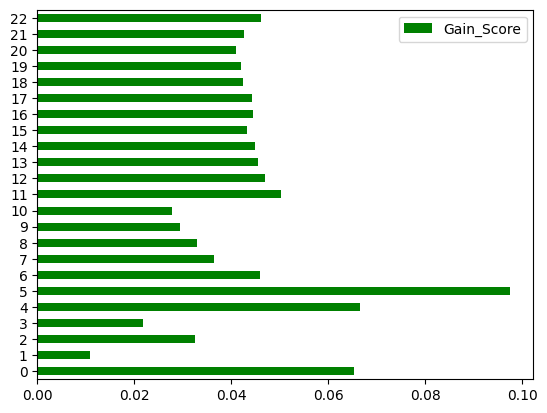

In [31]:
gains.plot(kind='barh',color='green') #vartical

<Figure size 1000x600 with 0 Axes>

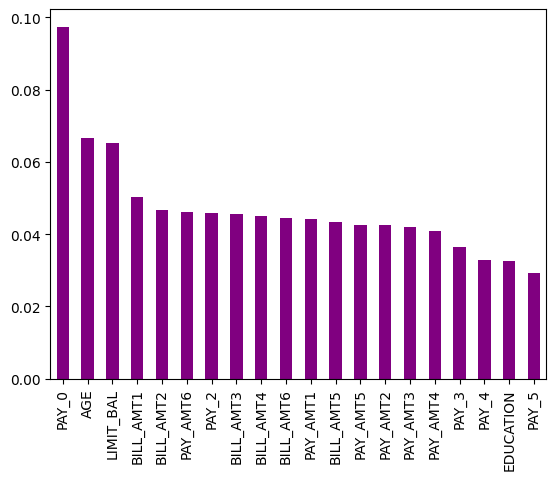

<Figure size 1000x600 with 0 Axes>

In [32]:
features = pd.Series(extr.feature_importances_, index=x.columns)
features.nlargest(20).plot(kind='bar', color='purple')
plt.figure(figsize=(10,6))

# Select K best

In [33]:
df2=pd.read_excel('credit card.xlsx')

In [34]:
df2 = df2.rename(columns={'default.payment.next.month':'payment'})

In [35]:
df2.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,payment
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [36]:
x=df2.drop(['ID','payment'],axis=1)

In [37]:
y=df2['payment']

In [38]:
from sklearn.feature_selection import SelectKBest,f_classif

In [39]:
model2=SelectKBest(score_func=f_classif)

In [40]:
feature_score=model2.fit(x,y)

In [41]:
feature_score.scores_

array([7.24068539e+02, 4.79788543e+01, 2.35471118e+01, 1.77812714e+01,
       5.78855582e+00, 3.53771497e+03, 2.23916914e+03, 1.75746644e+03,
       1.47684597e+03, 1.30459118e+03, 1.08540249e+03, 1.15805315e+01,
       6.04423789e+00, 5.94438771e+00, 3.09474518e+00, 1.37108740e+00,
       8.65820292e-01, 1.60403810e+02, 1.03291524e+02, 9.52180109e+01,
       9.71880005e+01, 9.14298008e+01, 8.50890453e+01])

In [42]:
cols=pd.DataFrame(feature_score.scores_,columns=['Feature Score'])

In [43]:
cols

,Feature Score
0,724.068539
1,47.978854
2,23.547112
3,17.781271
4,5.788556
5,3537.714970
6,2239.169136
7,1757.466444
8,1476.845967
9,1304.591176


In [44]:
cols2 = pd.DataFrame(x.columns, columns=['Feature Name'])

In [48]:
scores=pd.concat([cols2,cols],axis=1)

In [49]:
scores

,Feature Name,Feature Score
0,LIMIT_BAL,724.068539
1,SEX,47.978854
2,EDUCATION,23.547112
3,MARRIAGE,17.781271
4,AGE,5.788556
5,PAY_0,3537.714970
6,PAY_2,2239.169136
7,PAY_3,1757.466444
8,PAY_4,1476.845967
9,PAY_5,1304.591176


In [50]:
newx = scores.nlargest(15,'Feature Score')
newx

,Feature Name,Feature Score
5,PAY_0,3537.714970
6,PAY_2,2239.169136
7,PAY_3,1757.466444
8,PAY_4,1476.845967
9,PAY_5,1304.591176
10,PAY_6,1085.402485
0,LIMIT_BAL,724.068539
17,PAY_AMT1,160.403810
18,PAY_AMT2,103.291524
20,PAY_AMT4,97.188000


<Axes: >

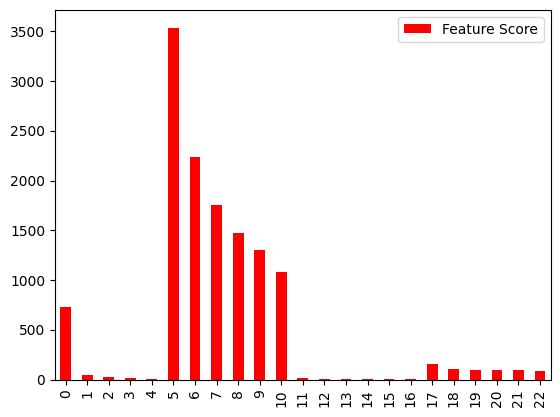

In [51]:
scores.plot(kind='bar',color='red')

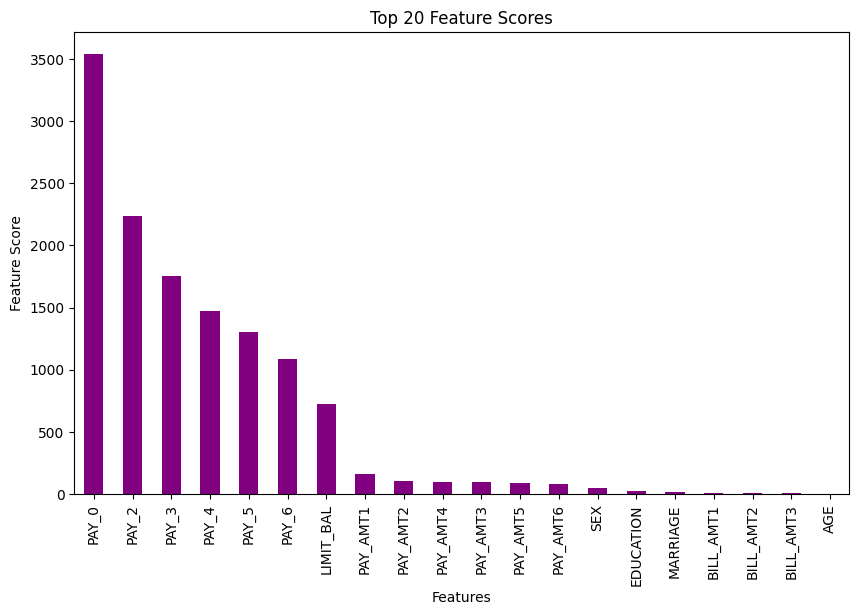

In [70]:
Score = pd.Series(feature_score.scores_, index=x.columns)

plt.figure(figsize=(10,6))
Score.nlargest(20).plot(kind='bar', color='purple')

plt.title("Top 20 Feature Scores")
plt.ylabel("Feature Score")
plt.xlabel("Features")
plt.show()

# PCA(Principal Component Analysis )

In [71]:
df = pd.read_excel('credit card.xlsx')
df = df.rename(columns={'default.payment.next.month':'payment'})
x = df.drop(['ID','payment'],axis=1)
y = df['payment']

In [72]:
from sklearn.preprocessing import MinMaxScaler
mmx = MinMaxScaler()

In [73]:
scaled_x = mmx.fit_transform(x)

In [74]:
scaled_x.shape

(30000, 23)

In [77]:
scaled_x

array([[0.01010101, 1.        , 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.11111111, 1.        , 0.33333333, ..., 0.00161031, 0.        ,
        0.00378311],
       [0.08080808, 1.        , 0.33333333, ..., 0.00161031, 0.00234451,
        0.00945777],
       ...,
       [0.02020202, 0.        , 0.33333333, ..., 0.00676329, 0.00468901,
        0.00586382],
       [0.07070707, 0.        , 0.5       , ..., 0.00310145, 0.12417444,
        0.00341236],
       [0.04040404, 0.        , 0.33333333, ..., 0.00161031, 0.00234451,
        0.00189155]])

In [79]:
from sklearn.decomposition import PCA

In [80]:
pca = PCA(n_components=3)

In [81]:
x_pca = pca.fit_transform(scaled_x)
x_pca

array([[ 0.40423245, -0.00800476,  0.00259672],
       [ 0.39188881,  0.209224  ,  0.19698759],
       [ 0.39264215,  0.08409527,  0.12656657],
       ...,
       [-0.62351265,  0.33728837,  0.08489178],
       [-0.60374479, -0.01953155, -0.214211  ],
       [-0.60917214,  0.0099741 , -0.23321988]])

In [82]:
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.55285284 0.14362722 0.09392221]


In [84]:
print("Total variance captured:", sum(pca.explained_variance_ratio_))

Total variance captured: 0.7904022739803044
